In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from datetime import datetime, date

In [4]:
df= pd.read_csv("superstore.csv", encoding='latin-1')
df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_ name,segment,city,state,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [3]:
y=df.groupby('segment').count()['order_id']

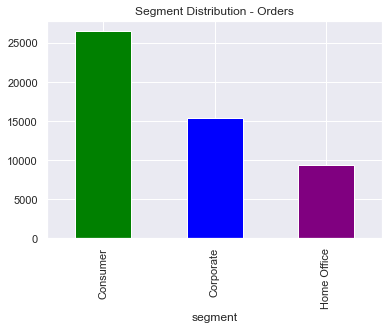

In [4]:
y.plot.bar(color=['green', 'blue', 'purple'])
plt.title('Segment Distribution - Orders')
plt.show()

In [7]:
profit_by_segment= df.groupby('segment').mean()['profit']
profit_by_segment

segment
Consumer       28.254008
Corporate      28.596042
Home Office    29.648847
Name: profit, dtype: float64

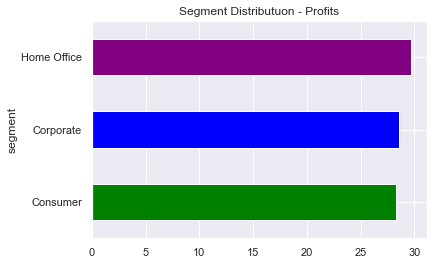

In [8]:
profit_by_segment.plot.barh(color=['green', 'blue', 'purple'])
plt.title('Segment Distributuon - Profits')
plt.show()

In [73]:
profit_by_category= df.groupby('category').sum()['profit']
profit_by_category

category
Furniture          285204.72380
Office Supplies    518473.83430
Technology         663778.73318
Name: profit, dtype: float64

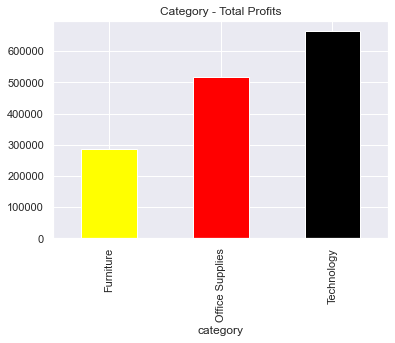

In [76]:
profit_by_category.plot.bar(color=['yellow', 'red', 'black'])
plt.title('Category - Total Profits')
plt.show()

In [15]:
df['price']= (df['sales']/df['quantity'])

No handles with labels found to put in legend.


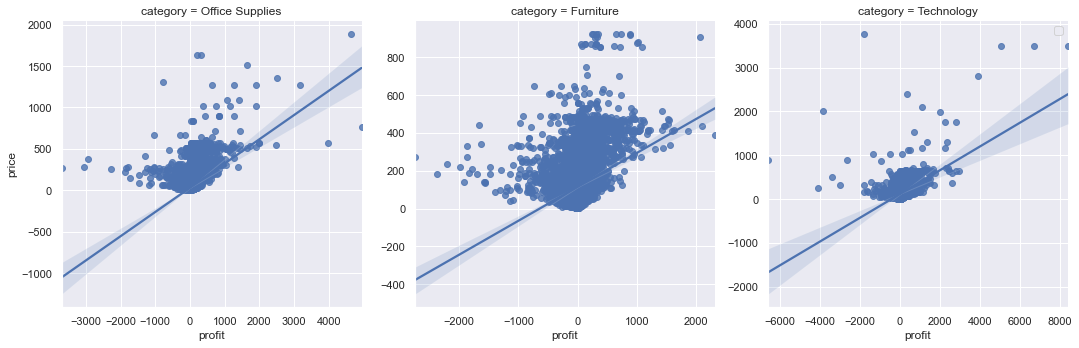

In [16]:
sns.lmplot(data=df, x="profit", y="price", col="category", sharex=False, sharey=False, col_wrap=4)
plt.legend()

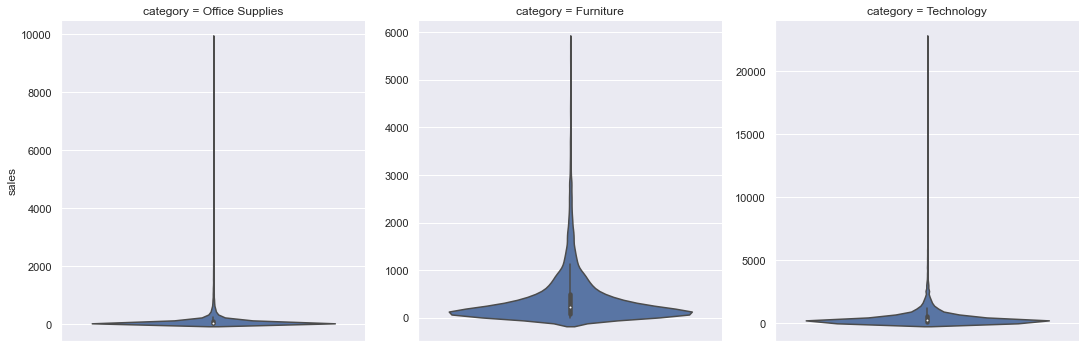

In [17]:
sns.catplot(data=df, y='sales', col='category', kind='violin', sharex=False, sharey=False, col_wrap=9)

In [35]:

import pymysql
from sqlalchemy import create_engine

In [36]:
username='root'
password=''
server='localhost'
database='test1'

In [37]:
engine = create_engine(f'mysql+pymysql://{username}:{password}@{server}/{database}')

In [38]:

df.to_sql(name='df',con=engine, if_exists='replace',index=False)

In [53]:
m=df.groupby('sub-category')['profit'].mean()
m.sort_values(ascending=False)

sub-category
Copiers        116.314687
Appliances      80.729681
Bookcases       67.160688
Phones          64.556749
Accessories     42.154896
Chairs          40.884178
Machines        39.614989
Storage         21.439314
Paper           16.734789
Furnishings     14.816223
Envelopes       12.156516
Art             11.868505
Binders         11.776633
Supplies         9.312686
Labels           5.759982
Fasteners        4.762572
Tables         -74.429023
Name: profit, dtype: float64

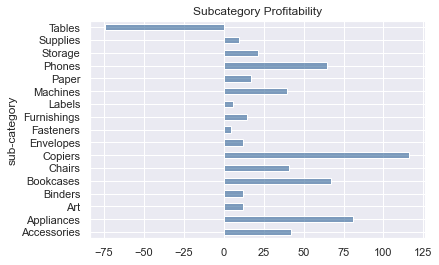

In [51]:
m.plot.barh(color=(0.2, 0.4, 0.6, 0.6))
plt.title('Subcategory Profitability')
plt.show()

In [59]:
m=df.groupby('country')['sales'].sum()
m.sort_values(ascending=False)

country
United States        2.297201e+06
Australia            9.252359e+05
France               8.589311e+05
China                7.005620e+05
Germany              6.288400e+05
                         ...     
Tajikistan           2.427840e+02
Macedonia            2.096400e+02
Eritrea              1.877400e+02
Armenia              1.567500e+02
Equatorial Guinea    1.505100e+02
Name: sales, Length: 147, dtype: float64

In [60]:
m=df.groupby('country')['sales'].sum()
m.sort_values(ascending=True)

country
Equatorial Guinea    1.505100e+02
Armenia              1.567500e+02
Eritrea              1.877400e+02
Macedonia            2.096400e+02
Tajikistan           2.427840e+02
                         ...     
Germany              6.288400e+05
China                7.005620e+05
France               8.589311e+05
Australia            9.252359e+05
United States        2.297201e+06
Name: sales, Length: 147, dtype: float64

In [ ]:
# Total sales : https://docs.google.com/spreadsheets/d/1Jsctav2LXcHzBpw9NFQTrvRY-emAPXD3rinFIbjW8gU/edit#gid=1821774376

In [ ]:
'''select extract(year from date), sum(sales)
from df
group by 1'''

In [6]:
df['date'] = pd.to_datetime(df['order_date'])
df.date

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
51285   2014-12-31
51286   2014-12-31
51287   2014-12-31
51288   2014-12-31
51289   2014-12-31
Name: date, Length: 51290, dtype: datetime64[ns]

In [7]:
df.date.dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
51285    2014
51286    2014
51287    2014
51288    2014
51289    2014
Name: date, Length: 51290, dtype: int64